In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import copy
import math
from datetime import datetime 
from matplotlib.dates import DateFormatter
import time
warnings.filterwarnings("ignore")

#os.chdir('/Users/Ivy/Desktop/ADS/Project1/raw_data') #change direction

In [6]:
# read in the data
df_allyellow = pd.read_feather('../preprocessed_data/engineered_yellow.feather').drop('index', axis=1)
df_allhvfhs = pd.read_feather('../preprocessed_data/engineered_hvfhs.feather').drop('index', axis=1)
df_allpm = pd.read_csv('../preprocessed_data/cleaned_pm.csv')

df_daily_yellow = pd.read_csv('../preprocessed_data/daily_yellow.csv')
df_daily_hvfhs = pd.read_csv('../preprocessed_data/daily_hvfhs.csv')


In [7]:
# read model data
df_ccny = pd.read_csv('../preprocessed_data/ccny.csv', index_col=0)
df_is = pd.read_csv('../preprocessed_data/is.csv', index_col=0)

df_daily_ccny = pd.read_csv('../preprocessed_data/daily_ccny.csv', index_col=0)

## Merge using month&day to draw graph

In [8]:
df_2019ccny = df_ccny.loc[df_ccny['date'] < '2020-01-01']
df_2020ccny = df_ccny.loc[df_ccny['date'] >'2020-01-01']

In [9]:
df_2019is = df_is.loc[df_is['date'] < '2020-01-01']
df_2020is = df_is.loc[df_is['date'] > '2020-01-01']

In [10]:
df_ccny_graph = pd.merge(df_2019ccny,df_2020ccny,left_on='day',right_on='day')
df_ccny_graph

,time_x,date_x,pm_x,year_x,day,time_y,date_y,pm_y,year_y
0,59,2019-03-01,7.8,2019,03-01,58,2020-03-01,5.9,2020
1,60,2019-03-02,8.2,2019,03-02,59,2020-03-02,12.3,2020
2,61,2019-03-03,9.0,2019,03-03,60,2020-03-03,10.9,2020
3,62,2019-03-04,7.1,2019,03-04,61,2020-03-04,4.8,2020
4,63,2019-03-05,7.5,2019,03-05,62,2020-03-05,5.2,2020
...,...,...,...,...,...,...,...,...,...
56,115,2019-04-26,4.0,2019,04-26,114,2020-04-26,3.1,2020
57,116,2019-04-27,3.6,2019,04-27,115,2020-04-27,1.4,2020
58,117,2019-04-28,4.9,2019,04-28,116,2020-04-28,4.6,2020
59,118,2019-04-29,4.5,2019,04-29,117,2020-04-29,5.5,2020


In [11]:
df_is_graph = pd.merge(df_2019is,df_2020is,left_on='day',right_on='day')
df_is_graph

,time_x,date_x,pm_x,year_x,day,time_y,date_y,pm_y,year_y
0,58,2019-03-01,7.8,2019,03-01,58,2020-03-01,7.2,2020
1,59,2019-03-02,10.2,2019,03-02,59,2020-03-02,13.5,2020
2,60,2019-03-03,9.2,2019,03-03,60,2020-03-03,11.7,2020
3,61,2019-03-04,8.4,2019,03-04,61,2020-03-04,6.2,2020
4,62,2019-03-05,8.9,2019,03-05,62,2020-03-05,6.5,2020
5,63,2019-03-06,10.1,2019,03-06,63,2020-03-06,5.6,2020
6,64,2019-03-07,10.1,2019,03-07,64,2020-03-07,5.2,2020
7,65,2019-03-08,10.1,2019,03-08,65,2020-03-08,6.4,2020
8,66,2019-03-09,13.5,2019,03-09,66,2020-03-09,11.5,2020
9,67,2019-03-10,8.2,2019,03-10,67,2020-03-10,11.5,2020


## Visualization

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from statsmodels.formula.api import *

warnings.filterwarnings("ignore")


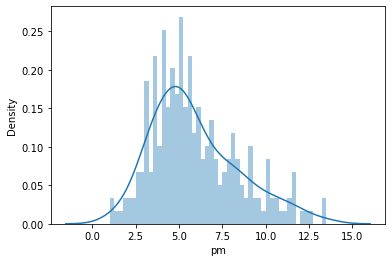

In [14]:
sns.distplot(df_allpm['pm'], bins=50)

plt.show()

## Test whether COVID-19 has an influence on PM2.5 

### CCNY 

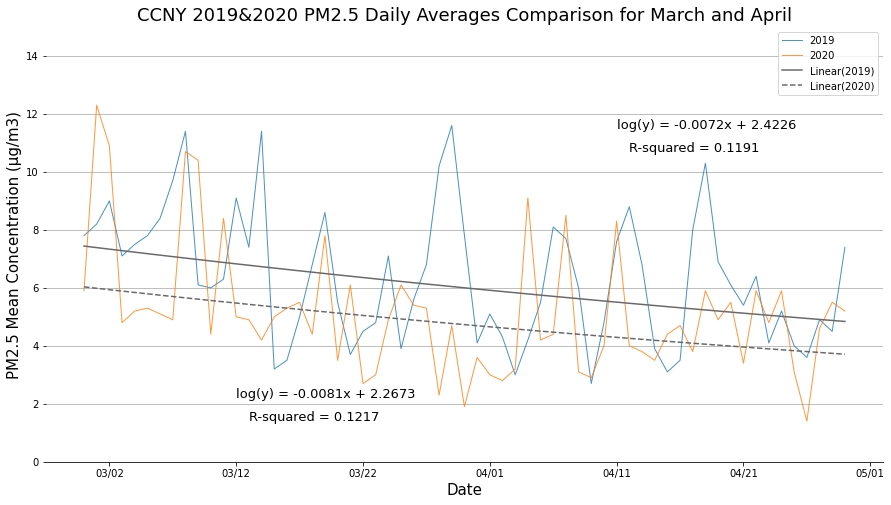

In [15]:
x = np.array(list(range(58, 119)))
y1 = list(df_ccny_graph['pm_x'])
y2 = list(df_ccny_graph['pm_y'])

###format
fig = plt.figure(figsize=[15, 8])
plt.grid(axis="y")
plt.ylim([0, 15])
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('PM2.5 Mean Concentration (µg/m3)',fontsize = 15)
ax.set_title('CCNY 2019&2020 PM2.5 Daily Averages Comparison for March and April',fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

## x-axis time format
dates = ['03/01','03/15','04/01','04/15','04/30']
#xs = [datetime.strptime(d, '%m/%d').date() for d in dates]
#ax.set_xlim(xs[0], xs[-1])

formatter = DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(formatter)

#plot the data
ax.plot(x, y1, '-',label='2019', alpha=0.8,linewidth=1)
ax.plot(x, y2, '-',label='2020', alpha=0.8,linewidth=1)

##set the legend
plt.legend(labels=('CCNY-2019','CCNY-2020'),loc='upper right',fontsize='large')

#plot the regression line after log transformation!
expx = np.array([math.exp(i) for i in x])
power2019 = np.array([math.pow(i, -0.0071663) for i in expx])
power2020 = np.array([math.pow(i, -0.008103177) for i in expx])

line2019 = power2019*math.exp(2.4226436)
line2020 = power2020*math.exp(2.267337161)
plt.plot(x, line2019, color='dimgrey',linestyle='-',label='Linear(2019)')
plt.plot(x, line2020, color='dimgrey',linestyle='--',label='Linear(2020)')

plt.legend()

plt.text(100,11.5,"log(y) = -0.0072x + 2.4226",fontsize=13)
plt.text(101,10.7,"R-squared = 0.1191",fontsize=13)

plt.text(70,2.2,"log(y) = -0.0081x + 2.2673",fontsize=13)
plt.text(71,1.4,"R-squared = 0.1217",fontsize=13)

plt.savefig('../plots/ccny_compare.png')

### IS143

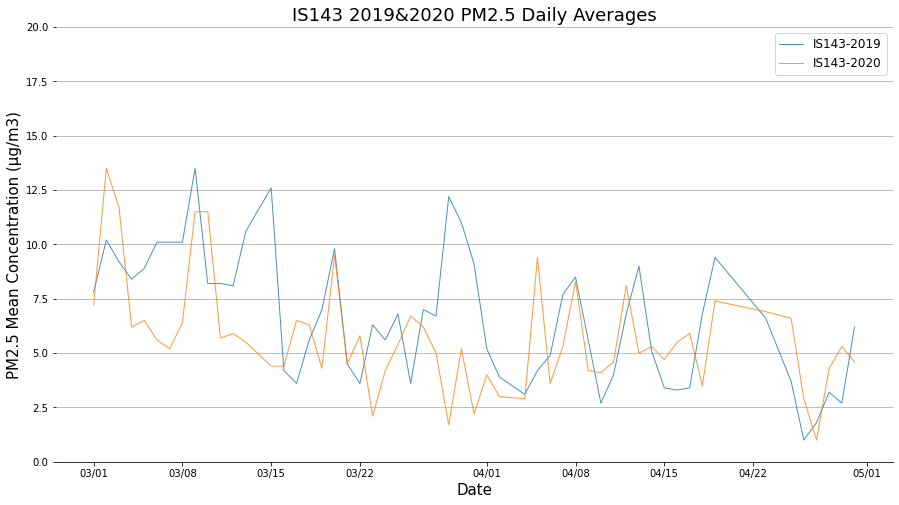

In [16]:
x = pd.to_datetime(df_is_graph['day'],format='%m-%d')
y1 = df_is_graph['pm_x']
y2 = df_is_graph['pm_y']

###format
fig = plt.figure(figsize=[15, 8])
plt.grid(axis="y")
plt.ylim([0, 20])
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('PM2.5 Mean Concentration (µg/m3)',fontsize = 15)
ax.set_title('IS143 2019&2020 PM2.5 Daily Averages',fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

## x-axis time format
formatter = DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(formatter)

#plot the data
ax.plot(x, y1, '-',label='2019', alpha=0.8,linewidth=1)
ax.plot(x, y2, '-',label='2020', alpha=0.8,linewidth=1)

##set the legend
plt.legend(labels=('IS143-2019','IS143-2020'),loc='upper right',fontsize='large')

#plot the regression line
#day = list(range(118))
#line2019 = 693.46320045-0.03671366*day
#line2020 = 1147.80146842-0.06104878*day
#ax.plot(day, line2019, color='r')

## Explore PM2.5 and taxi features -- use CCNY site

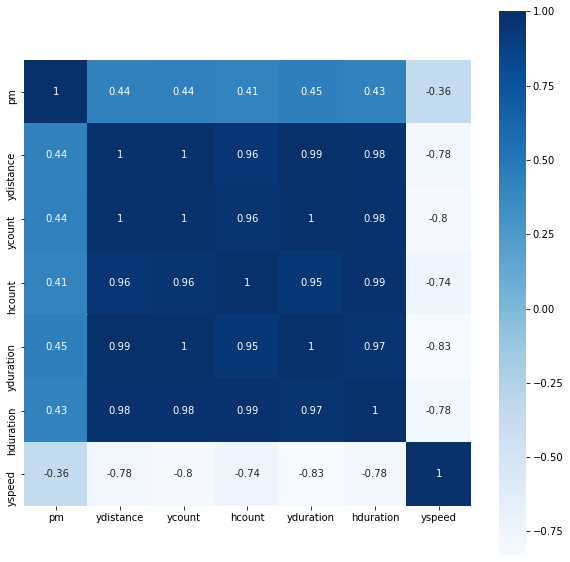

In [15]:
CORR = ['pm', 'ydistance','ycount','hcount','yduration','hduration','yspeed']
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_daily_ccny[CORR].corr(), square=True, annot=True,cmap='Blues')
fig.show()